<a href="https://colab.research.google.com/github/Ethanshibu/ML-Mix/blob/main/Digitclassifier_tfkeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(99)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
  print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


 #training images = 60k
 #training labels = 60k
 #testing images = 10k,
 #testing labels = 10k
 #image dimensions 28x28
 #already converted to greyscale

In [6]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

LETS TRY DISPLAYING THE IMAGE

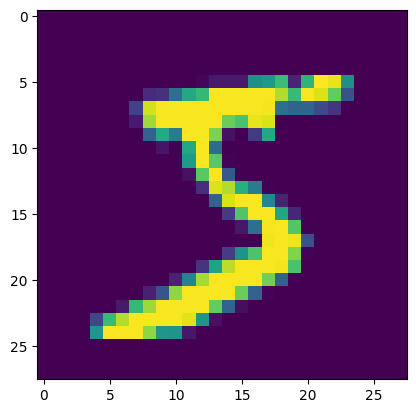


Corresponding label:  5


In [7]:
plt.imshow(x_train[0])
plt.show()
print()
print("Corresponding label: ",y_train[0])

In [8]:
x_train = x_train/255
x_test = x_test/255

To build the digit classifier, we will use a neural neural network

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

Now we compile the neural network

In [11]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [12]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8512 - loss: 0.5304
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9466 - loss: 0.1827
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9617 - loss: 0.1326
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9695 - loss: 0.1058
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9746 - loss: 0.0879
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9781 - loss: 0.0750
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9806 - loss: 0.0653
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9833 - loss: 0.0567
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9860 - loss: 0.0496
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9877 - loss: 0.0435


Training data accuracy = 98.77%

In [13]:
loss, accuracy = model.evaluate(x_test,y_test)
print("Test loss: ",loss)
print("Test accuracy: ",accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9658 - loss: 0.1153
Test loss:  0.09845614433288574
Test accuracy:  0.972100019454956


Test accuracy = 97.21%

To test the model, we will use the test image 99

9


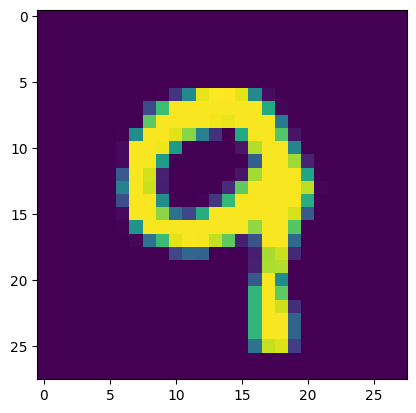

In [16]:
print(y_test[99])
plt.imshow(x_test[99])

In [18]:
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [22]:
print(y_pred.shape)
print(y_pred[99])

(10000, 10)
[1.4597224e-03 4.2288403e-10 1.6640584e-04 4.0990651e-01 4.7824606e-01
 7.4392224e-06 2.3925361e-06 6.2841976e-01 2.0110512e-02 9.9994928e-01]


The predicted values have been stored in y_pred.
y_pred[99] gives us the probability distribution of what the model thinks is the most likely answer for x_test[99], for the digits 0 to 9 in that order. It has correctly predicted that the class is a 9, with a slight skew towards 5.


In [29]:
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

In [30]:
cf = confusion_matrix(y_test,y_pred_labels)
print(cf)

tf.Tensor(
[[ 967    0    1    0    1    1    5    1    2    2]
 [   0 1127    3    0    0    1    1    0    3    0]
 [   4    4 1000    0    7    0    4    6    7    0]
 [   2    2    9  971    0    8    0    7    8    3]
 [   1    2    3    0  965    0    4    0    0    7]
 [   5    1    0   10    2  858    8    1    5    2]
 [   5    3    4    1    1    2  940    1    1    0]
 [   2    4   15    1    4    1    0  994    1    6]
 [   9    3    8    4    5    2    4    3  934    2]
 [   3    6    2    4   14    3    0    6    7  964]], shape=(10, 10), dtype=int32)


Text(158.22222222222223, 0.5, 'Truth')

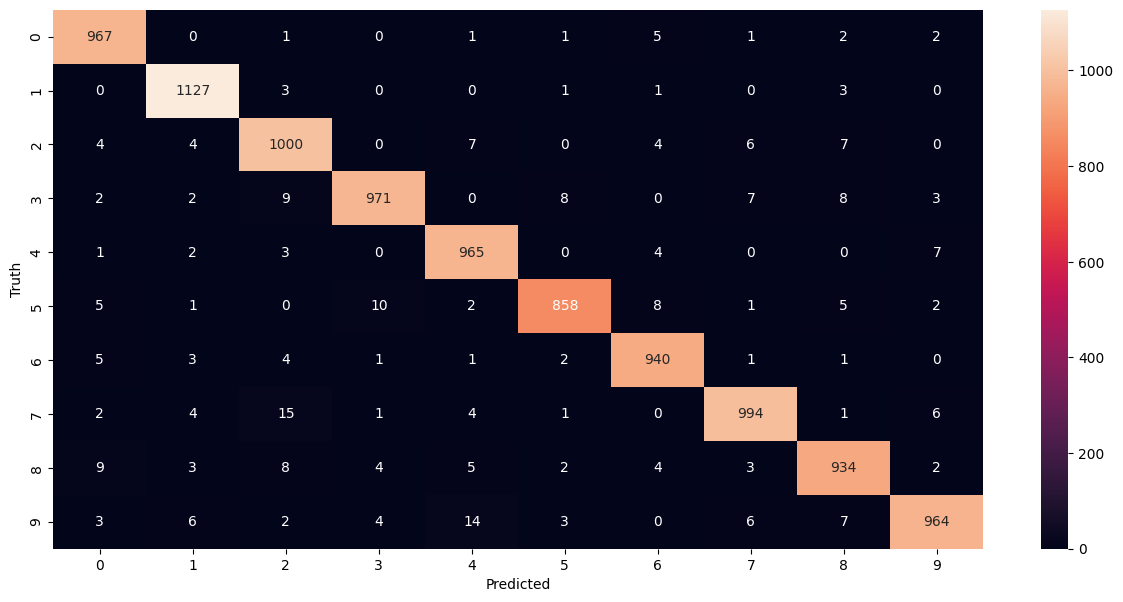

In [31]:
plt.figure(figsize=(15,7))
sns.heatmap(cf,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [32]:
!wget 'https://source.roboflow.com/n1GDkPzWPqTgMt8ZZ4dQ9eEol1Y2/05OageWmDVTBfBrk8bBW/original.jpg'

--2025-06-15 19:24:12--  https://source.roboflow.com/n1GDkPzWPqTgMt8ZZ4dQ9eEol1Y2/05OageWmDVTBfBrk8bBW/original.jpg
Resolving source.roboflow.com (source.roboflow.com)... 35.190.21.63
Connecting to source.roboflow.com (source.roboflow.com)|35.190.21.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15497 (15K) [image/jpeg]
Saving to: ‘original.jpg’

original.jpg        100%[===================>]  15.13K  --.-KB/s    in 0s      

2025-06-15 19:24:12 (109 MB/s) - ‘original.jpg’ saved [15497/15497]



### PREDICTIVE SYSTEM

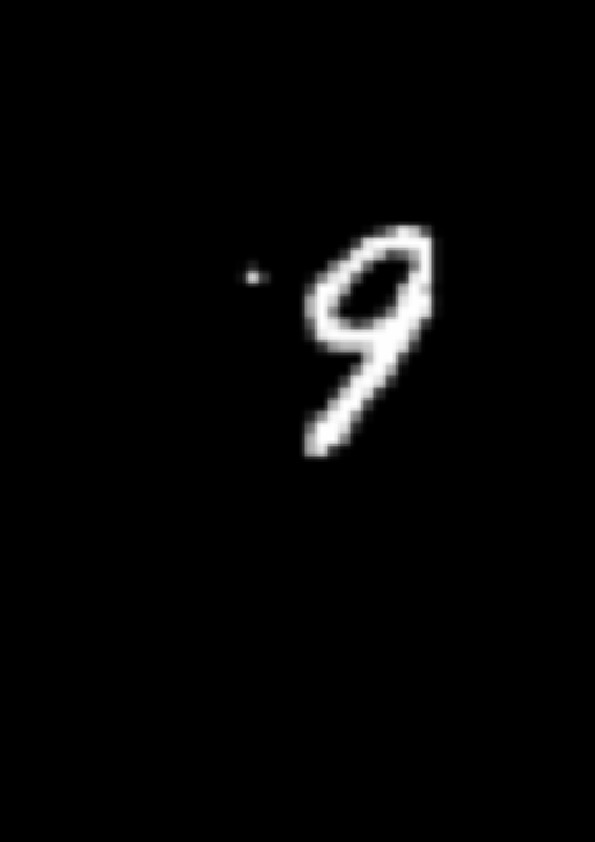

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
[[0.0476356  0.83902013 0.01437325 0.24089186 0.538843   0.09990272
  0.00222689 0.9235642  0.10350209 0.945518  ]]
PREDICTED LABEL 9


In [62]:
input_img_path = '/content/sample_data/original.jpg'
input_img = cv2.imread(input_img_path)
cv2_imshow(input_img)
grey_img = cv2.cvtColor(resized_img,cv2.COLOR_BGR2GRAY)
grey_img = grey_img/255
image_reshaped = np.reshape(grey_img,[1,28,28])
input_prediction = model.predict(image_reshaped)
print(input_prediction)
input_pred_label = np.argmax(input_prediction)
print('PREDICTED LABEL',input_pred_label)